In [66]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [67]:
# Load data
df = pd.read_csv("../Data/final_data.csv")

#don't want to cluster by county name or by water year, just location and rainfall data
unlabeled = df.drop('County', axis=1)
unlabeled = unlabeled.drop('WaterYear', axis=1)

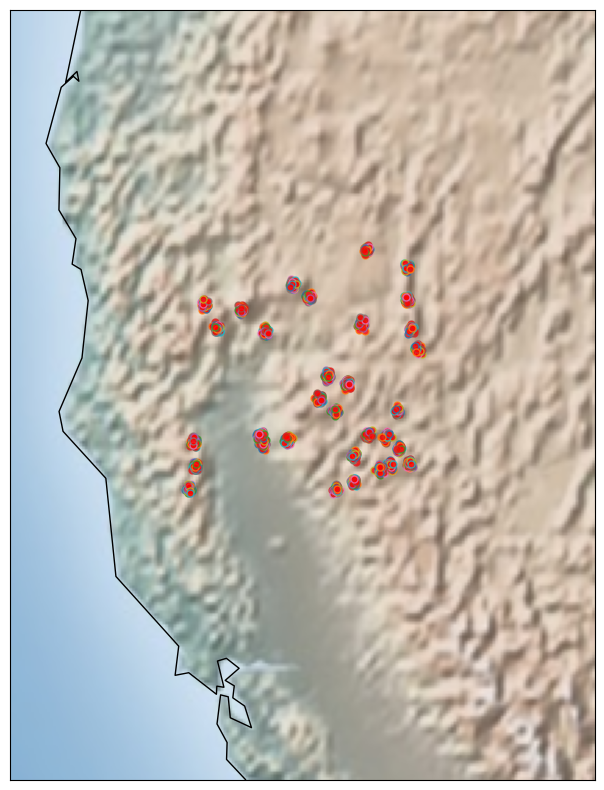

In [68]:
#plot data

rcParams["figure.figsize"] = (14, 10)

my_map = Basemap(
    projection="merc",
    resolution="l",
    area_thresh=1000.0,
    llcrnrlon=-125,
    llcrnrlat=37,
    urcrnrlon=-118,
    urcrnrlat=44,
)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.shadedrelief()

#add a little variation so points are not plotted directly over each other
df['xvar'] = np.random.normal(0, 0.02, df.shape[0])
df['yvar'] = np.random.normal(0, 0.02, df.shape[0])

df['xvar'] += df['x_coord']
df['yvar'] += df['y_coord']

xs, ys = my_map(np.asarray(df.xvar), np.asarray(df.yvar))
df["xm"] = xs.tolist()
df["ym"] = ys.tolist()

# plot the stations on the map
for index, row in df.iterrows():
    my_map.plot(
        row.xm,
        row.ym,
        markerfacecolor=([1, 0, 0]),
        marker="o",
        markersize=5,
        alpha=0.75,
    )
plt.show()

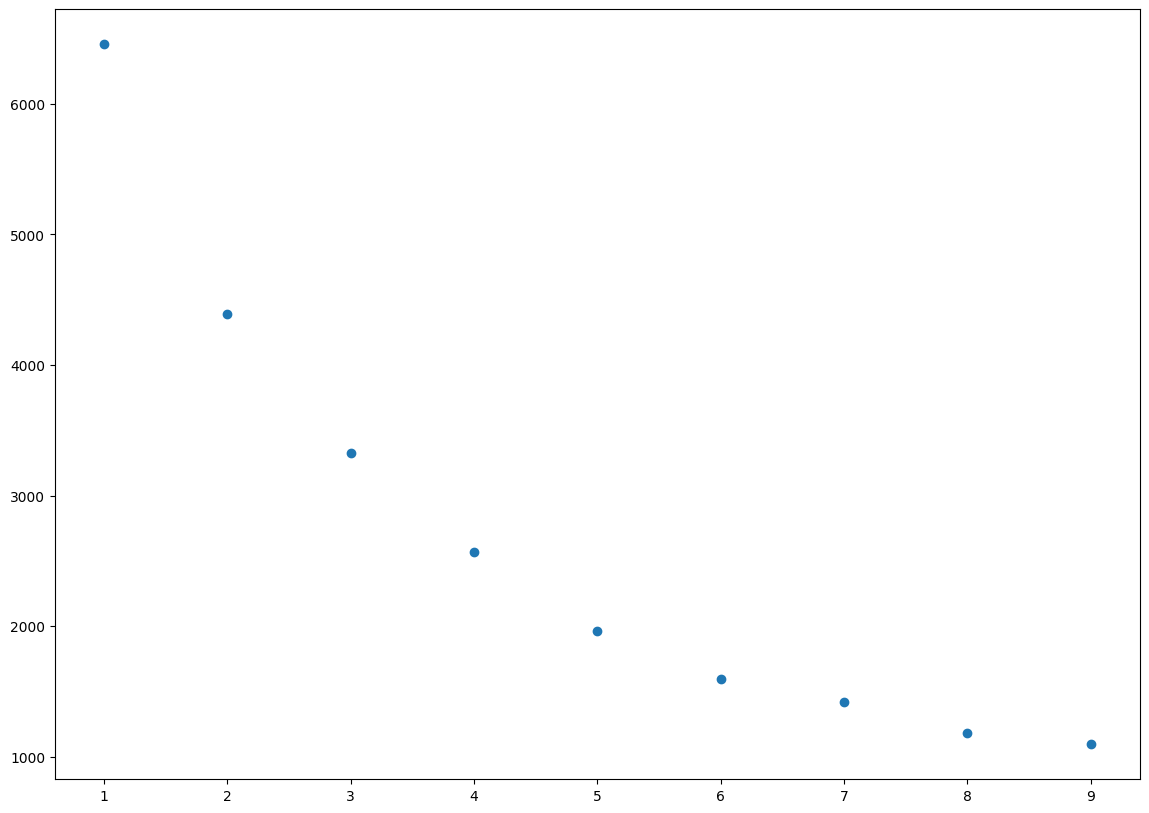

In [69]:
scaled = StandardScaler().fit_transform(unlabeled)
costs = []

#fit kmeans model and plot errors
for groups in range(1,10):
    km = KMeans(n_clusters=groups, tol=0.0000001, random_state=0, n_init='auto').fit(scaled)
    costs.append(km.inertia_)

plt.scatter(x=range(1,10), y=costs)

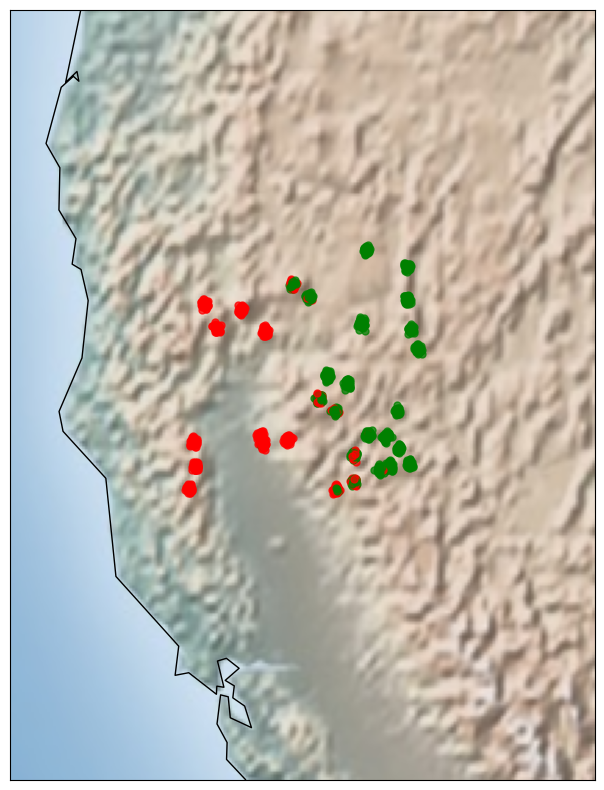

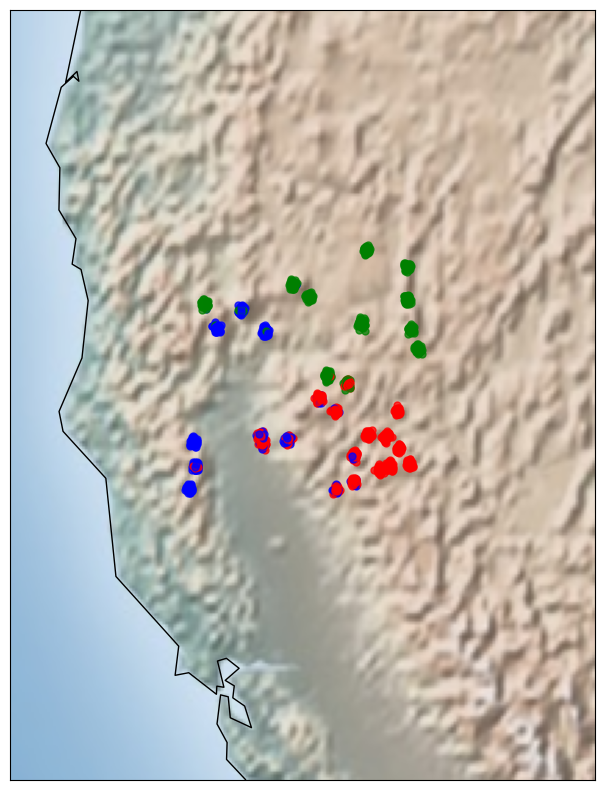

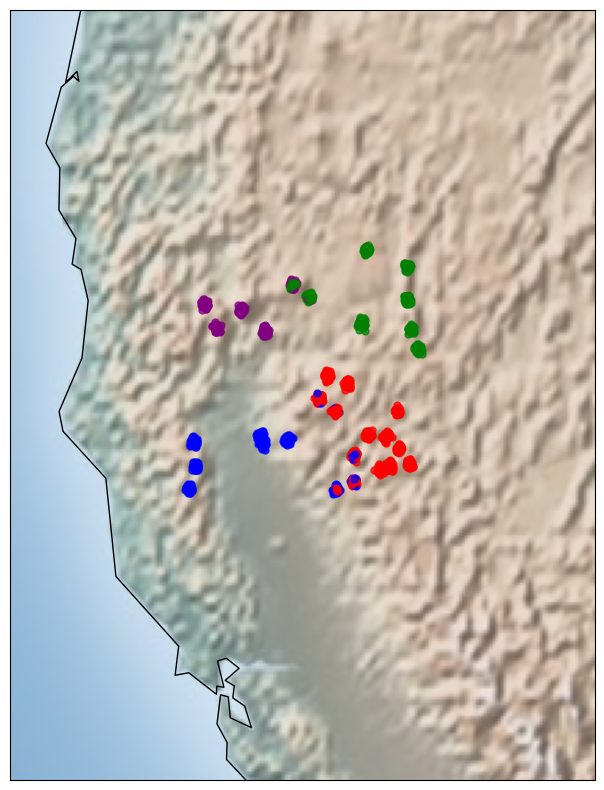

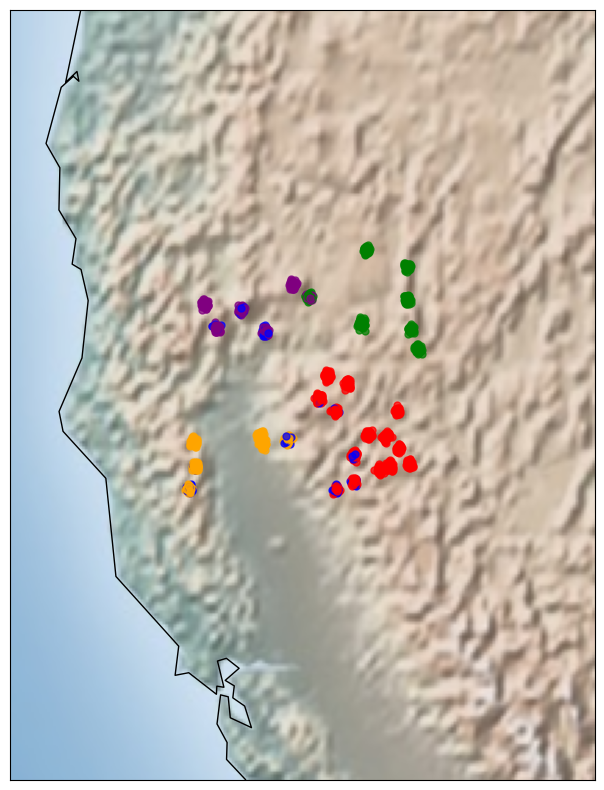

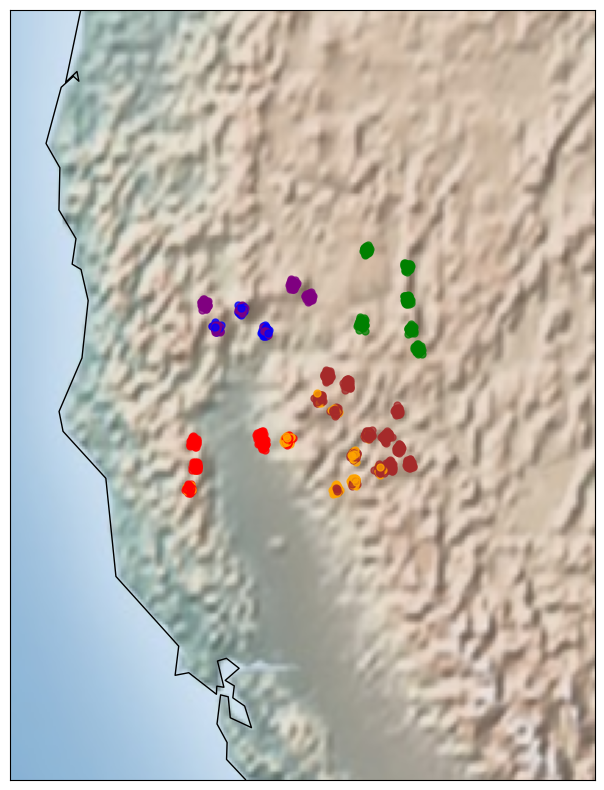

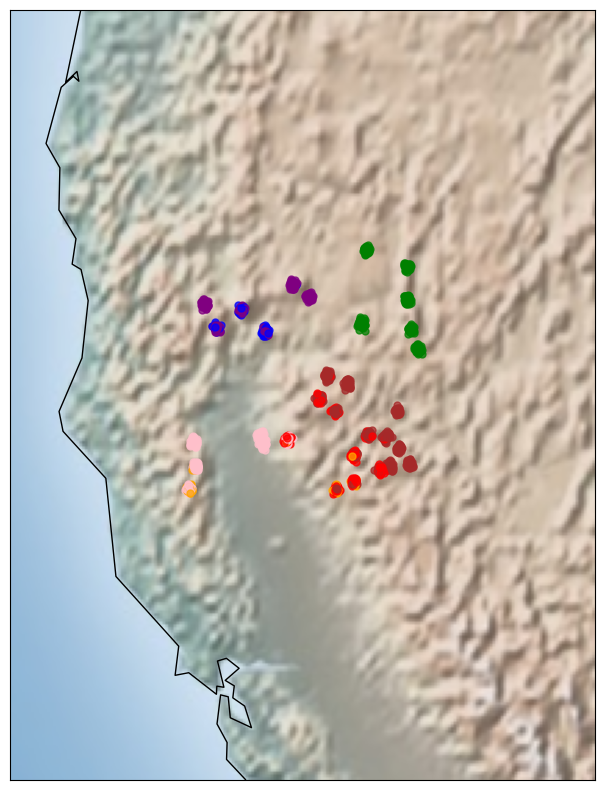

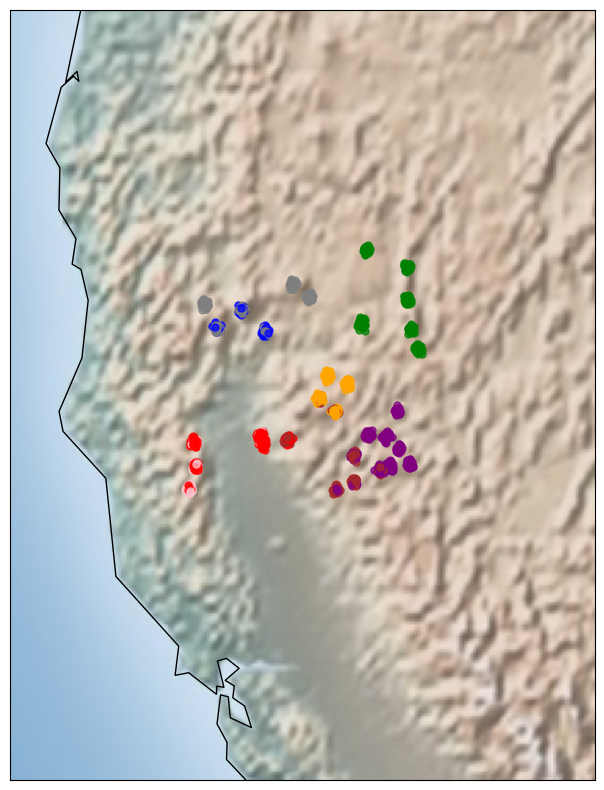

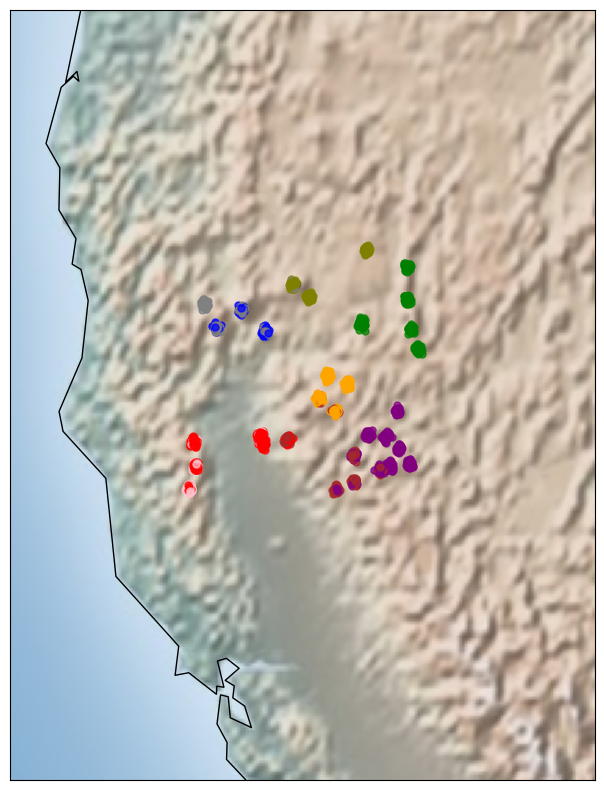

In [73]:
for groups in range(2,10):
    km2 = KMeans(n_clusters=groups, tol=0.0000001, random_state=0, n_init='auto').fit(scaled)
    labels = km2.labels_
    centers = km2.cluster_centers_

    #plot clustering results
    rcParams["figure.figsize"] = (14, 10)
    my_map = Basemap(
        projection="merc",
        resolution="l",
        area_thresh=1000.0,
        llcrnrlon=-125,
        llcrnrlat=37,
        urcrnrlon=-118,
        urcrnrlat=44,
    )
    my_map.drawcoastlines()
    my_map.drawcountries()
    my_map.shadedrelief()

    colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for index, label in enumerate(labels):
        my_map.plot(xs[index], ys[index], marker='o', markersize=5, color=colors[int(label)], alpha=0.75)

    plt.show()